In [ ]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import shap
import seaborn as sns

In [ ]:
train = pd.read_csv("train.csv")

#Análise Geral dos Dados
| Feature                                       | Variable    | Value Type                                       |   |
|-----------------------------------------------|-------------|--------------------------------------------------|---|
| Survival    (Target Variable)                         | Survived | binary
|Ticket Class | Pclass | 1: 1st; 2: 2nd; 3: 3rd
|Sex	| Sex	| categorical code
|Age | Age | float(years)
| Number of Sibilings/spouses* | Sibsp | int
| Number of parents/children** | Parch | int
| Ticket |	Ticket | int
| Amount paid for the ticket	| Fare | float
|Cabin |	Cabin |
| Port of Embarkation | Embarked	| categorial code (C: Cherbourg, Q: Queenstown, S: Southampton)

*The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)

**parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

In [ ]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train.shape

(891, 12)

Percebemos a presença de valores nulos em Embarked, Cabin e Age.
* A quantidade de valores nulos em Cabin é alta (77% da coluna em falta), logo, essa variável não será tão impactante no problema. Iremos removê-la.
* Para Embarked, apenas duas linhas tem valores nulos. Vamos eliminá-las.
* Para Age, 177 valores faltantes (19,86%). Por isso, vamos estimar esses valores. Utilizamos Regressão Linear para fazê-lo. Para os valores

In [ ]:
train = train.drop('Cabin', axis=1) #Delete the Cabin column

In [ ]:
train = train.dropna(subset=['Embarked']) #Delete rows with null values in 'Embarked'


In [ ]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [ ]:
media_idade = train['Age'].mean()

In [ ]:
from sklearn.linear_model import LinearRegression

#dropna exclui valores nulos.
dados_conhecidos = train.dropna(subset=['Age'])
#isna seleciona valores nulos.
dados_desconhecidos = train[train.isna().any(axis=1)]
colunas_numericas = dados_conhecidos.select_dtypes(include='number').columns.tolist()
# Treina um modelo de regressão linear
X = dados_conhecidos[colunas_numericas].drop('Age', axis=1)
y = dados_conhecidos['Age']
regressao = LinearRegression().fit(X, y)

# Utiliza o modelo para prever os valores desconhecidos
X_pred = dados_desconhecidos[colunas_numericas].drop('Age', axis=1)
y_pred = regressao.predict(X_pred)

# Preenche os valores desconhecidos com as previsões
dados_desconhecidos['Age'] = y_pred

# Junta os dois conjuntos em um único DataFrame
train = pd.concat([dados_conhecidos, dados_desconhecidos])



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
#Atribui o valor da média para idades nulas/negativas.
for index, row in train.iterrows():
    if row['Age'] <= 0 or np.isnan(row['Age']):
        train.loc[index, 'Age'] = media_idade

In [ ]:
print( (train['Age'] <= 0).sum()) #verificando que realmente não tem valores menores ou iguais a zero.

0


In [ ]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.531900,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.336641,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,21.589120,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.053765,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.678005,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

#Análise Exploratória de Dados

## Variáveis Numéricas

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=4, cols=1) #cria espaço com 4 linhas
fig.add_trace(go.Box(x=train['Age'], name = 'Idade'), row=1, col=1) #cria na primeira linha um boxplot sobre a idade dos pacientes
fig.add_trace(go.Box(x=train['SibSp'], name = 'Número de Irmãos/Conjuges'), row=2, col=1)
fig.add_trace(go.Box(x=train['Fare'], name = 'Valor do Bilhete'), row=3, col=1)
fig.add_trace(go.Box(x=train['Parch'], name = 'Número de Pais/Filhos'), row=4, col=1)
fig.update_layout(height = 800, template='plotly_dark')
fig.show()

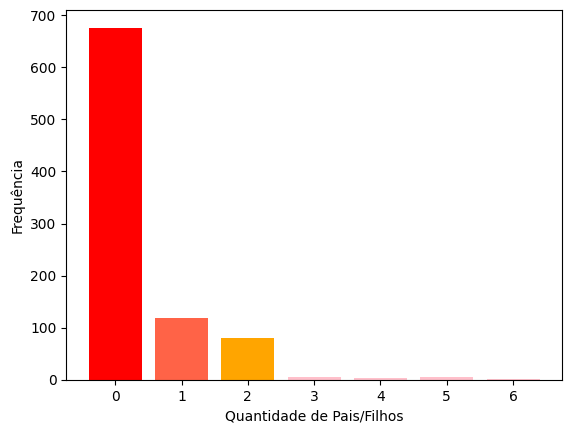

In [ ]:
# obtém a contagem de ocorrências de cada valor único na coluna "Parch"
contagem = train['Parch'].value_counts()

# separa os valores únicos e as contagens em listas separadas
valores_unicos = contagem.index.tolist()
frequencia = contagem.tolist()

# plota o gráfico de barras
plt.bar(valores_unicos, frequencia, color=['red', 'tomato', 'orange', 'pink', 'pink', 'pink', 'pink'])

# adiciona rótulos aos eixos x e y
plt.xlabel('Quantidade de Pais/Filhos')
plt.ylabel('Frequência')

# exibe o gráfico
plt.show()

## Dados categóricos

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
fig = make_subplots (rows=3, cols=1)
fig.add_trace(go.Bar(y= train['Pclass'].value_counts(), x = ['1ª classe', '2ª classe', '3ª classe'], name='Classe'), row=1, col=1)
fig.add_trace(go.Bar(y= train['Sex'].value_counts(), x = ['Masculino', 'Feminino'], name='Sexo'), row=2, col=1)
fig.add_trace(go.Bar(y= train['Embarked'].value_counts(), x = ['Cherbourg', 'Queenstown', 'Southampton'], name='Portão de Embarque'), row=3, col=1)
fig.update_layout(
    title={
        'text': "Análise de Variáveis Categóricas",
        'y': 0.95,
        'x': 0.5,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    template='plotly_dark',
    height=800,
    width=1000
)
fig.show()

In [ ]:
train.groupby(['Pclass', 'Survived']).count()['PassengerId']

Pclass  Survived
1       0            80
        1           134
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

In [ ]:
train.groupby(['Sex', 'Survived']).count()['PassengerId']

Sex     Survived
female  0            81
        1           231
male    0           468
        1           109
Name: PassengerId, dtype: int64

In [ ]:
train.groupby(['Embarked', 'Survived']).count()['PassengerId']

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
Name: PassengerId, dtype: int64

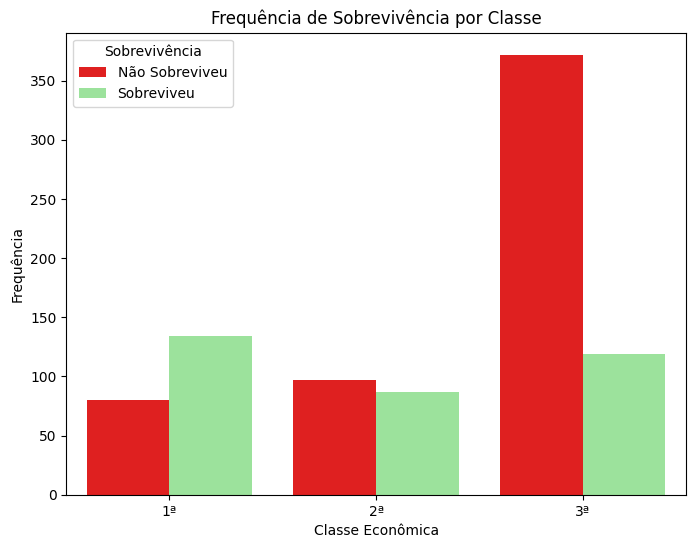

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Pclass', hue='Survived', palette={0: 'red', 1: 'lightgreen'})

plt.title("Frequência de Sobrevivência por Classe")
plt.xlabel('Classe Econômica')
plt.ylabel("Frequência")

plt.xticks(ticks=[0, 1, 2], labels=['1ª', '2ª', '3ª'])
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

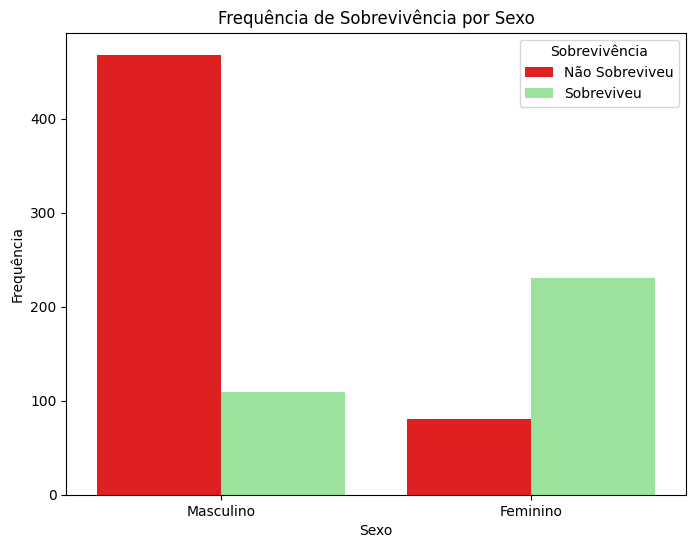

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Sex', hue='Survived', palette={0: 'red', 1: 'lightgreen'})

plt.title("Frequência de Sobrevivência por Sexo")
plt.xlabel('Sexo')
plt.ylabel("Frequência")

plt.xticks(ticks=[0, 1], labels=['Masculino', 'Feminino'])
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

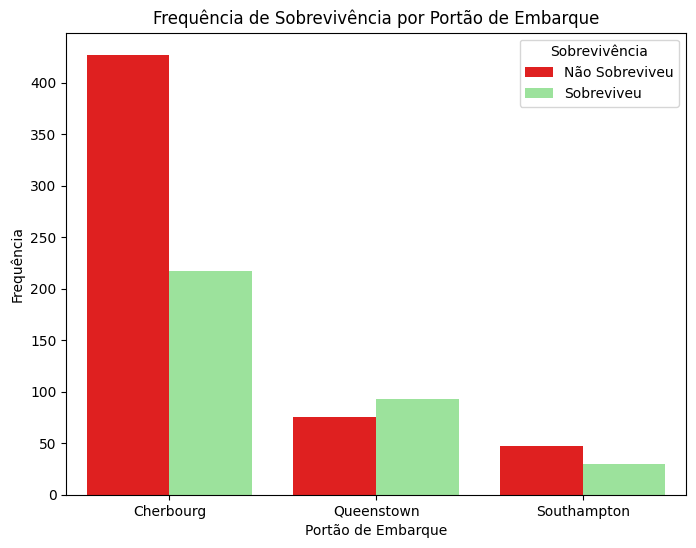

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(data=train, x='Embarked', hue='Survived', palette={0: 'red', 1: 'lightgreen'})

plt.title("Frequência de Sobrevivência por Portão de Embarque")
plt.xlabel('Portão de Embarque')
plt.ylabel("Frequência")

plt.xticks(ticks=[0, 1, 2], labels=['Cherbourg', 'Queenstown', 'Southampton'])
plt.legend(title='Sobrevivência', labels=['Não Sobreviveu', 'Sobreviveu'])
plt.show()

#Treinamento de Modelos


##1. Random Forest
A utilização de Random Forest exige que as variáveis categóricas sejam transformadas. Utilizarei variáveis dummy nesse processo.

In [ ]:
train_copia = train.copy()
train_copia['Sex'] = train_copia['Sex'].map({'male': 0, 'female': 1})
# criando as colunas binárias para a categoria 'Embarked'
train_copia['Embarked_C'] = 0
train_copia['Embarked_Q'] = 0
train_copia['Class_1'] = 0
train_copia['Class_2'] = 0

# atribuindo os valores 1 nas colunas correspondentes
for i, embarked in enumerate(train_copia['Embarked']):
    if embarked == 'C':
        train_copia.loc[i, 'Embarked_C'] = 1
        train_copia.loc[i, 'Embarked_Q'] = 0
    elif embarked == 'Q':
        train_copia.loc[i, 'Embarked_C'] = 0
        train_copia.loc[i, 'Embarked_Q'] = 1
    elif embarked == 'S':
        train_copia.loc[i, 'Embarked_C'] = 0
        train_copia.loc[i, 'Embarked_Q'] = 0

for i, embarked in enumerate(train_copia['Pclass']):
    if embarked == 'C':
        train_copia.loc[i, 'Embarked_C'] = 1
        train_copia.loc[i, 'Embarked_Q'] = 0
    elif embarked == 'Q':
        train_copia.loc[i, 'Embarked_C'] = 0
        train_copia.loc[i, 'Embarked_Q'] = 1
    elif embarked == 'S':
        train_copia.loc[i, 'Embarked_C'] = 0
        train_copia.loc[i, 'Embarked_Q'] = 0

# removendo a coluna original 'Embarked'
train_copia = train_copia.drop('Embarked', axis=1)
train_copia.dropna(inplace=True)

In [ ]:
# Cria as variáveis dummy
dummies = pd.get_dummies(train_copia['Pclass'], prefix='Pclass')

# Concatena as variáveis dummy com o DataFrame original
train_copia = pd.concat([train_copia, dummies], axis=1)

train_copia = train_copia.drop('Pclass', axis=1)

In [ ]:
test = pd.read_csv("test.csv")

In [ ]:
test = test.drop('Cabin', axis=1) #Delete the Cabin column

In [ ]:
test.isna().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
dtype: int64

In [ ]:
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

In [ ]:
from sklearn.linear_model import LinearRegression

#dropna exclui valores nulos.
dados_conhecidos = test.dropna(subset=['Age'])
#isna seleciona valores nulos.
dados_desconhecidos = test[test.isna().any(axis=1)]
colunas_numericas = dados_conhecidos.select_dtypes(include='number').columns.tolist()
# Treina um modelo de regressão linear
X = dados_conhecidos[colunas_numericas].drop('Age', axis=1)
y = dados_conhecidos['Age']
regressao = LinearRegression().fit(X, y)

# Utiliza o modelo para prever os valores desconhecidos
X_pred = dados_desconhecidos[colunas_numericas].drop('Age', axis=1)
y_pred = regressao.predict(X_pred)

# Preenche os valores desconhecidos com as previsões
dados_desconhecidos['Age'] = y_pred

# Junta os dois conjuntos em um único DataFrame
test = pd.concat([dados_conhecidos, dados_desconhecidos])

<ipython-input-34-1a216cdeba15>:18: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print( (test['Age'] <= 0).sum()) #verificando que realmente não tem valores menores ou iguais a zero.

0


In [ ]:
test_copia = test.copy()
test_copia['Sex'] = test_copia['Sex'].map({'male': 0, 'female': 1})
# criando as colunas binárias para a categoria 'Embarked'
test_copia['Embarked_C'] = 0
test_copia['Embarked_Q'] = 0

# atribuindo os valores 1 nas colunas correspondentes
for i, embarked in enumerate(test_copia['Embarked']):
    if embarked == 'C':
        test_copia.loc[i, 'Embarked_C'] = 1
        test_copia.loc[i, 'Embarked_Q'] = 0
    elif embarked == 'Q':
        test_copia.loc[i, 'Embarked_C'] = 0
        test_copia.loc[i, 'Embarked_Q'] = 1
    elif embarked == 'S':
        test_copia.loc[i, 'Embarked_C'] = 0
        test_copia.loc[i, 'Embarked_Q'] = 0

# removendo a coluna original 'Embarked'
test_copia = test_copia.drop('Embarked', axis=1)


# Cria as variáveis dummy
dummies = pd.get_dummies(test_copia['Pclass'], prefix='Pclass')

# Concatena as variáveis dummy com o DataFrame original
test_copia = pd.concat([test_copia, dummies], axis=1)

test_copia = test_copia.drop('Pclass', axis=1)

In [ ]:
test_copia

,PassengerId,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
0,892,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,0,1,0,0,1
1,893,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,0,0,0,0,1
2,894,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,0,1,0,1,0
3,895,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,0,0,0,0,1
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,1300,"Riordan, Miss. Johanna Hannah""""",1,22.885299,0,0,334915,7.7208,0,0,0,0,1
410,1302,"Naughton, Miss. Hannah",1,22.871595,0,0,365237,7.7500,0,1,0,0,1
413,1305,"Spector, Mr. Woolf",0,22.857678,0,0,A.5. 3236,8.0500,0,1,0,0,1
416,1308,"Ware, Mr. Frederick",0,22.835986,0,0,359309,8.0500,0,0,0,0,1


In [ ]:
null_rows = test_copia.loc[test_copia.isnull().any(axis=1)].index.tolist()

In [ ]:
test_copia = test_copia.drop(index=null_rows)

In [ ]:
X_train = train_copia.drop(['Survived', 'PassengerId', 'Name', 'Ticket'], axis=1)
y_train = train_copia['Survived']
X_test = test_copia.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

In [ ]:
X_train.rename(columns={'Pclass_1.0':'Pclass_1', 'Pclass_2.0':'Pclass_2', 'Pclass_3.0':'Pclass_3' }, inplace=True)

In [ ]:
X_train

,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Pclass_1,Pclass_2,Pclass_3
0,0.0,22.000000,1.0,0.0,7.2500,0.0,0.0,0,0,1
1,1.0,38.000000,1.0,0.0,71.2833,1.0,0.0,1,0,0
2,1.0,26.000000,0.0,0.0,7.9250,0.0,0.0,0,0,1
3,1.0,35.000000,1.0,0.0,53.1000,0.0,0.0,1,0,0
4,0.0,35.000000,0.0,0.0,8.0500,0.0,0.0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
859,0.0,29.201784,0.0,0.0,7.2292,0.0,1.0,0,0,1
863,1.0,29.642093,8.0,2.0,69.5500,0.0,0.0,0,0,1
868,0.0,29.169102,0.0,0.0,9.5000,1.0,0.0,0,0,1
878,0.0,29.194918,0.0,0.0,7.8958,0.0,1.0,0,0,1


In [ ]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor()
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)


In [ ]:
y_test = np.where(predictions >= 0.5, 1, 0)

In [ ]:
y_test

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,

In [ ]:
#Random Forest algorithm
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

rf_clf.score(X_test, y_test)


0.937799043062201

In [ ]:
rf_clf.score(X_train, y_train)

0.9921259842519685

In [ ]:
final_dataframe = test

In [ ]:
final_dataframe = final_dataframe.assign(Survived=y_test)

In [ ]:
final_dataframe = final_dataframe.drop(['Pclass', 'Age', 'Name', 'Sex', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], axis=1)


In [ ]:
final_dataframe

,PassengerId,Survived
0,892,0
1,893,0
2,894,1
3,895,0
4,896,0
...,...,...
408,1300,1
410,1302,1
413,1305,0
416,1308,0


In [ ]:
final_dataframe.to_csv('titanic0.csv', index=False)


In [ ]:
test_copia

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_C,Embarked_Q
0,892,3,"Kelly, Mr. James",0,34.500000,0,0,330911,7.8292,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.000000,1,0,363272,7.0000,0,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.000000,0,0,240276,9.6875,0,1
3,895,3,"Wirz, Mr. Albert",0,27.000000,0,0,315154,8.6625,0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.000000,1,1,3101298,12.2875,0,0
...,...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",1,22.885299,0,0,334915,7.7208,0,0
410,1302,3,"Naughton, Miss. Hannah",1,22.871595,0,0,365237,7.7500,0,1
413,1305,3,"Spector, Mr. Woolf",0,22.857678,0,0,A.5. 3236,8.0500,0,1
416,1308,3,"Ware, Mr. Frederick",0,22.835986,0,0,359309,8.0500,0,0


/usr/local/lib/python3.10/dist-packages/shap/plots/_beeswarm.py:664: UserWarning:

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored



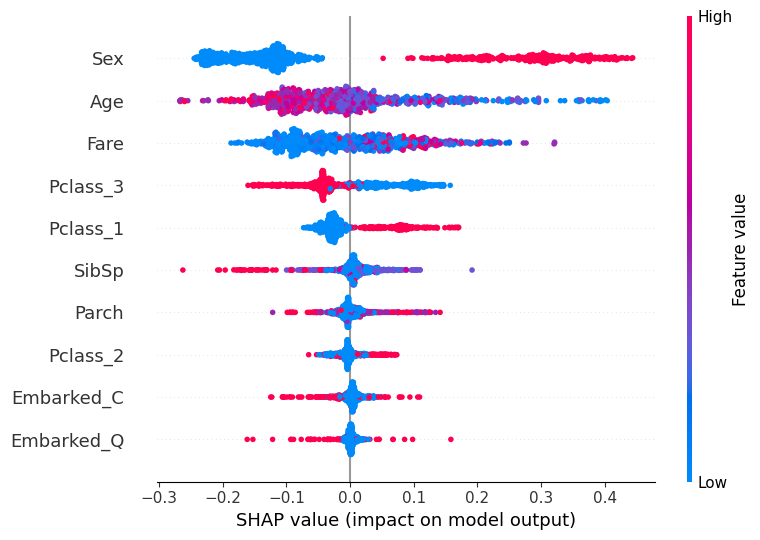

In [ ]:
import shap
explainer = shap.TreeExplainer(rf_clf)
shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values[1], X_train)
#variáveis a direita impactam positivamente no modelo. A esquerda, negativamente.